In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd

# Load data

## Read total NO ALIGNED articles with csv file

In [ ]:
df_transcript = pd.read_csv('/content/drive/MyDrive/ZH-KO-TRANSLATOR/CORPUS/FULL_TEXT_WORD_TOKENS.csv')
df_transcript.head()
#df_transcript.tail()

In [ ]:
df_transcript = pd.read_csv('/content/drive/MyDrive/ZH-KO-TRANSLATOR/CORPUS/TED_EN_KO_ZH.csv')
df_transcript.head()
#df_transcript.tail()

In [ ]:
df_transcript = df_transcript.to_dict(orient='dict')

In [ ]:
ESENT = []
KSENT = []
ZSENT = []
for i in range(len(df_transcript['ENGLISH'])):
  ESENT.append(df_transcript['ENGLISH'][i])
  KSENT.append(df_transcript['KOREAN'][i])
  ZSENT.append(df_transcript['CHINESE(ZH-TW)'][i])

In [ ]:
df_transcript = []

## Read sentence for each ALIGNED article csv file.

In [ ]:
#total_article_len = 4937

In [ ]:
'''TRAIN_ESENT = []
TRAIN_KSENT = []
TRAIN_ZSENT = []
TEST_ESENT = []
TEST_KSENT = []
TEST_ZSENT = []'''

In [ ]:
# 載入訓練集和測試集的索引
train_indices = np.load('/content/drive/MyDrive/ZH-KO-TRANSLATOR/MODELS/INDEX/train_indices.npy')
test_indices = np.load('/content/drive/MyDrive/ZH-KO-TRANSLATOR/MODELS/INDEX/test_indices.npy')

In [ ]:
'''
for j in train_indices:
  df_transcript = pd.read_csv('/content/drive/MyDrive/ZH-KO-TRANSLATOR/CORPUS/ALIGNED/MERGE/{}.csv'.format(j+1))
  df_transcript = df_transcript.to_dict(orient='dict')
  TRAIN_ESENT += (list(df_transcript['EN'].values()))
  TRAIN_KSENT += (list(df_transcript['KO'].values()))
  TRAIN_ZSENT += (list(df_transcript['ZH-TW'].values()))
  print('{}.csv read'.format(j+1))
  '''

In [ ]:
'''
df_train_transcript = pd.DataFrame({'EN':TRAIN_ESENT,'KO':TRAIN_KSENT,'ZH-TW':TRAIN_ZSENT})
df_train_transcript.to_csv('/content/drive/MyDrive/ZH-KO-TRANSLATOR/CORPUS/ALIGNED/MERGE/TRAIN_ALL.csv',index=False)'''

In [ ]:
'''
for j in test_indices:
  df_transcript = pd.read_csv('/content/drive/MyDrive/ZH-KO-TRANSLATOR/CORPUS/ALIGNED/MERGE/{}.csv'.format(j+1))
  df_transcript = df_transcript.to_dict(orient='dict')
  TEST_ESENT += (list(df_transcript['EN'].values()))
  TEST_KSENT += (list(df_transcript['KO'].values()))
  TEST_ZSENT += (list(df_transcript['ZH-TW'].values()))
  print('{}.csv read'.format(j+1))'''

In [ ]:
'''
df_test_transcript = pd.DataFrame({'EN':TEST_ESENT,'KO':TEST_KSENT,'ZH-TW':TEST_ZSENT})
df_test_transcript.to_csv('/content/drive/MyDrive/ZH-KO-TRANSLATOR/CORPUS/ALIGNED/MERGE/TEST_ALL.csv',index=False)'''

## Parse to train and test set

In [ ]:
'''
from sklearn.model_selection import train_test_split
import numpy as np

# 使用 train_test_split 函數將資料集分為訓練集和測試集，並獲取索引
train_indices, test_indices = train_test_split(
    np.arange(len(ZSENT)), test_size=0.2, random_state=42)

# test_size 參數可以設置測試集的比例，例如 0.2 表示測試集占整個資料集的 20%
# random_state 參數可用於設置隨機種子，確保每次運行結果都是相同的

# 現在您可以將 train_indices 和 test_indices 用於存儲索引

# 將索引存儲到文件中
np.save('/content/drive/MyDrive/ZH-KO-TRANSLATOR/MODELS/INDEX/train_indices.npy', train_indices)
np.save('/content/drive/MyDrive/ZH-KO-TRANSLATOR/MODELS/INDEX/test_indices.npy', test_indices)
'''

In [ ]:
'''
import numpy as np

# 載入訓練集和測試集的索引
train_indices = np.load('/content/drive/MyDrive/ZH-KO-TRANSLATOR/MODELS/INDEX/train_indices.npy')
test_indices = np.load('/content/drive/MyDrive/ZH-KO-TRANSLATOR/MODELS/INDEX/test_indices.npy')

# 使用索引來選擇訓練集和測試集的相應資料
train_source_sentences = [ZSENT[i] for i in train_indices]
train_target_sentences = [KSENT[i] for i in train_indices]
test_source_sentences = [ZSENT[i] for i in test_indices]
test_target_sentences = [KSENT[i] for i in test_indices]

# 現在您可以使用 train_source_sentences、train_target_sentences、
# test_source_sentences 和 test_target_sentences 來訓練和測試您的模型。
'''

## Read sentence for each ALIGNED article csv file with train set and test set.

In [7]:
df_train_transcript = pd.read_csv('./MERGE/TRAIN_ALL.csv')
df_train_transcript = df_train_transcript.to_dict(orient='dict')
TRAIN_ESENT = (list(df_train_transcript['EN'].values()))
TRAIN_KSENT = (list(df_train_transcript['KO'].values()))
TRAIN_ZSENT = (list(df_train_transcript['ZH-TW'].values()))
df_train_transcript = []

In [8]:
df_test_transcript = pd.read_csv('./MERGE/TEST_ALL.csv')
df_test_transcript = df_test_transcript.to_dict(orient='dict')
TEST_ESENT = (list(df_test_transcript['EN'].values()))
TEST_KSENT = (list(df_test_transcript['KO'].values()))
TEST_ZSENT = (list(df_test_transcript['ZH-TW'].values()))
df_test_transcript = []

# Pretrain Model

In [2]:
import torch
from transformers import BertTokenizer, BertModel, BertConfig, BertForPreTraining, AutoModel, BertTokenizerFast
from torch.utils.data import Dataset, DataLoader
from transformers import BertConfig, BertForMaskedLM
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import time

## Set parameters

In [9]:
# 設定訓練參數
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
max_length = 64
batch_size = 8
#batch_size = 32
learning_rate = 1e-4
num_epochs = 20

In [10]:
print(device)

cuda


## Load Tokenizer

### Chinese Tokenizer

In [ ]:
zh_tokenizer = BertTokenizerFast.from_pretrained('bert-base-chinese')
#zh_bert_model = AutoModel.from_pretrained('ckiplab/bert-base-chinese')

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/269k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/409M [00:00<?, ?B/s]

Some weights of BertModel were not initialized from the model checkpoint at ckiplab/bert-base-chinese and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Korean Tokenizer

In [ ]:
ko_tokenizer = BertTokenizerFast.from_pretrained("kykim/bert-kor-base")
#ko_bert_model = BertModel.from_pretrained("kykim/bert-kor-base")

tokenizer_config.json:   0%|          | 0.00/80.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/344k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/476M [00:00<?, ?B/s]

### mBERT Tokenizer

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
#bert_model = BertModel.from_pretrained('bert-base-multilingual-cased').to(device)

### Merge 3 Tokenizers

#### Merge vocabs in 3 Tokenizers

In [10]:
# combine 3 languages vocabs
from transformers import BertTokenizer

# 加载三个不同语言的 BERT 分词器
tokenizer_chinese = BertTokenizer.from_pretrained('bert-base-chinese')
tokenizer_korean = BertTokenizer.from_pretrained('kykim/bert-kor-base')
tokenizer_multi = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# 获取每个分词器的词汇表
vocab_chinese = tokenizer_chinese.get_vocab()
vocab_korean = tokenizer_korean.get_vocab()
vocab_multi = tokenizer_multi.get_vocab()
print('ZH:',len(vocab_chinese),'KO:',len(vocab_korean),'M:',len(vocab_multi))

# 合并词汇表
combined_vocab = vocab_chinese.copy()
print('Length of ZH VOCAB:', len(combined_vocab))
combined_vocab.update(vocab_korean)
print('Combined KO:', len(combined_vocab))
#combined_vocab.update(vocab_multi)
#print('Combined M:', len(combined_vocab))


# 创建新的分词器，并使用合并后的词汇表
#tokenizer_combined = BertTokenizer(vocab_file=None, vocab_dict=combined_vocab)

# 保存合并后的词汇表
#tokenizer_combined.save_pretrained('combined_tokenizer')

ZH: 21128 KO: 42000 M: 119547
Length of ZH VOCAB: 21128
Combined KO: 61951


In [11]:
# save vocabs as txt file
combined_vocab_path = './MODELS/VOCAB/combined_vocab_without_mbert.txt'

# 将合并后的词汇表保存到文本文件中
with open(combined_vocab_path, 'w', encoding='utf-8') as f:
    for token in combined_vocab.keys():
        f.write(token + '\n')

### Load mBERT model with combined vocab

In [6]:
# 加载 mBERT 分词器
tokenizer_mbert = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
#zh_tokenizer = BertTokenizerFast.from_pretrained('bert-base-chinese')
#ko_tokenizer = BertTokenizerFast.from_pretrained("kykim/bert-kor-base")

# 加载合并后的词汇表
combined_vocab_path = './MODELS/VOCAB/combined_vocab.txt'
combined_vocab_without_mbert_path = './MODELS/VOCAB/combined_vocab_without_mbert.txt'
combined_vocab = []
with open(combined_vocab_without_mbert_path,'r',encoding='utf-8') as f:
  combined_vocab = f.readlines()

tokenizer_mbert.add_tokens(combined_vocab)
tokenizer_mbert.save_pretrained('./MODELS/TOKENIZER/new_tokenizer_mbert')

#zh_tokenizer.add_tokens(combined_vocab)
#zh_tokenizer.save_pretrained('./MODELS/TOKENIZER/new_tokenizer_zh')

#ko_tokenizer.add_tokens(combined_vocab)
#ko_tokenizer.save_pretrained('./MODELS/TOKENIZER/new_tokenizer_ko')


('./MODELS/TOKENIZER/new_tokenizer_mbert/tokenizer_config.json',
 './MODELS/TOKENIZER/new_tokenizer_mbert/special_tokens_map.json',
 './MODELS/TOKENIZER/new_tokenizer_mbert/vocab.txt',
 './MODELS/TOKENIZER/new_tokenizer_mbert/added_tokens.json')

In [11]:
# 加载 mBERT 模型
model_mbert = BertModel.from_pretrained('bert-base-multilingual-cased')

In [12]:
# 加載新的合併後的tokenizer
tokenizer_mbert = BertTokenizer.from_pretrained('./MODELS/TOKENIZER/new_tokenizer_mbert')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [13]:
my_model = model_mbert
my_tokenizer = tokenizer_mbert
model_name = 'ZK2_zh_ko_mbert'

### Get Embeddings

In [25]:
# 输入文本
text = "你好，世界。Hello, world. 안녕하세요."

# 使用 mBERT 分词器对文本进行编码
inputs = tokenizer_mbert(text, return_tensors='pt', padding=True, truncation=True).to(device)

# 将输入传递给 mBERT 模型以获取输出
with torch.no_grad():
    outputs = model_mbert(**inputs)

# 提取嵌入
embeddings = outputs.last_hidden_state

print(embeddings)

tensor([[[ 0.0834,  0.1195,  0.1512,  ...,  0.0713, -0.1297,  0.0857],
         [-0.0137,  0.6475,  0.4393,  ...,  0.3994, -0.0228,  0.1335],
         [-0.0557,  0.4393,  0.6668,  ...,  0.5037, -0.3144,  0.1783],
         ...,
         [ 0.0868,  0.2485,  0.5221,  ..., -0.2744, -0.6142,  0.0964],
         [ 0.0645, -0.2859,  1.0986,  ..., -0.2260, -0.5496,  0.1751],
         [ 0.1186,  0.0599,  0.9049,  ..., -0.0926, -0.3840,  0.0296]]],
       device='cuda:0')


### Build Dataset Function

In [14]:
# 假設您有一個平行語料庫，這是您的資料集
class TranslationDataset(Dataset):
    def __init__(self, source_sentences, target_sentences):
        self.source_sentences = source_sentences
        self.target_sentences = target_sentences
        self.length = len(source_sentences)

    def __len__(self):
        return self.length

    def __getitem__(self, index):
        source = self.source_sentences[index]
        target = self.target_sentences[index]
        return source, target


### Build Model

In [15]:
# 建立模型
class TranslationModel(nn.Module):
    global my_tokenizer
    def __init__(self, bert_model):
        super(TranslationModel, self).__init__()
        self.bert = bert_model
        self.linear = nn.Linear(self.bert.config.hidden_size, my_tokenizer.vocab_size)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        prediction_scores = self.linear(outputs.last_hidden_state)
        return prediction_scores


### Data Loader

In [16]:
# 載入資料集
train_source_sentences = TRAIN_ZSENT  # 中文句子
train_target_sentences = TRAIN_KSENT  # 韓文句子
dataset = TranslationDataset(train_source_sentences, train_target_sentences)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [17]:
test_source_sentences = TEST_ZSENT  # 中文句子
test_target_sentences = TEST_KSENT  # 韓文句子
test_dataset = TranslationDataset(test_source_sentences, test_target_sentences)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

### Model

In [18]:
# 初始化模型、損失函數和優化器
model = TranslationModel(my_model).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [19]:
# 加載訓練好的模型
#model = TranslationModel(model_mbert).to(device)
model.load_state_dict(torch.load('./MODELS/best_translation_model({}).pth'.format(model_name)))

<All keys matched successfully>

### Train and Evaluate

In [20]:
def epoch_time(start_time, end_time):
  elapsed_time = end_time - start_time
  elapsed_mins = int(elapsed_time/60)
  elapsed_secs = int(elapsed_time%60)
  return elapsed_mins, elapsed_secs

In [ ]:
!pip install tqdm

In [21]:
from tqdm import tqdm

In [22]:
def train(path):
    global model, dataloader, optimizer, criterion, my_tokenizer
    model.train()
    total_loss = 0
    with tqdm(total = len(dataloader)) as pbar:
      for batch in dataloader:
        source_batch, target_batch = batch
        source_tokens = my_tokenizer(source_batch, padding='max_length', truncation=True, return_tensors='pt', max_length=max_length).to(device)
        target_tokens = my_tokenizer(target_batch, padding='max_length', truncation=True, return_tensors='pt', max_length=max_length).to(device)

        optimizer.zero_grad()
        output = model(input_ids=source_tokens.input_ids, attention_mask=source_tokens.attention_mask)
        loss = criterion(output.transpose(1, 2), target_tokens.input_ids)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        pbar.update(1)
    torch.save(model.state_dict(), path)

    return total_loss/len(dataloader)

In [23]:
def evaluate():
  global model, test_dataloader, criterion, my_tokenizer
  model.eval()
  total_loss = 0
  with torch.no_grad():
    with tqdm(total = len(test_dataloader)) as pbar:
      for batch in test_dataloader:
        source_batch, target_batch = batch
        source_tokens = my_tokenizer(source_batch, padding='max_length', truncation=True, return_tensors='pt', max_length=max_length).to(device)
        target_tokens = my_tokenizer(target_batch, padding='max_length', truncation=True, return_tensors='pt', max_length=max_length).to(device)

        output = model(input_ids=source_tokens.input_ids, attention_mask=source_tokens.attention_mask)
        loss = criterion(output.transpose(1, 2), target_tokens.input_ids)

        total_loss += loss.item()
        pbar.update(1)

  return total_loss/len(test_dataloader)

In [24]:
def loss_history(train_loss_values, test_loss_values, path='', to_show=False):
  before_train_loss = []
  before_test_loss = []
  try:
    df_loss = pd.read_csv('./MODELS/LOSS_HISTORY/loss_plot_{}.csv'.format(path))
    df_loss.to_dict(orient='dict')

    try:
      before_train_loss = list(df_loss['TRAIN_LOSS'].values())
      before_test_loss = list(df_loss['TEST_LOSS'].values())
    except:
      before_train_loss = list(df_loss['TRAIN_LOSS'])
      before_test_loss = list(df_loss['TEST_LOSS'])


  except:
    before_train_loss = []
    before_test_loss = []

  if(len(before_train_loss)>0):
    train_loss_values = before_train_loss + train_loss_values
    test_loss_values = before_test_loss + test_loss_values

  # 假設您有每個 epoch 的索引
  epochs = range(1, len(train_loss_values) + 1)
  plt.clf()

  # 繪製訓練損失和測試損失的折線圖
  plt.plot(epochs, train_loss_values, 'b', label='Training loss')
  plt.plot(epochs, test_loss_values, 'r', label='Test loss')
  plt.title('Training and Test Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  # 儲存折線圖
  plt.savefig('./MODELS/LOSS_HISTORY/loss_plot_{}.png'.format(path))
  if to_show:
    plt.show()

  df_loss = pd.DataFrame({'TRAIN_LOSS':train_loss_values,'TEST_LOSS':test_loss_values})
  df_loss.to_csv('./MODELS/LOSS_HISTORY/loss_plot_{}.csv'.format(path),index=False)

In [25]:
def bleu_history(bleu_score_values, path='', to_show=False):
  before_bleu_score = []
  try:
    df_loss = pd.read_csv('./MODELS/LOSS_HISTORY/blue_plot_{}.csv'.format(path))
    df_loss.to_dict(orient='dict')

    try:
      before_bleu_score = list(df_loss['BLEU_SCORE'].values())
    except:
      before_bleu_score = list(df_loss['BLEU_SCORE'])


  except:
    before_bleu_score = []

  if(len(before_bleu_score)>0):
    bleu_score_values = before_bleu_score + bleu_score_values

  # 假設您有每個 epoch 的索引
  epochs = range(1, len(bleu_score_values) + 1)
  plt.clf()

  # 繪製訓練損失和測試損失的折線圖
  plt.plot(epochs, bleu_score_values, 'b', label='BLEU score')
  plt.title('BLEU SCORE')
  plt.xlabel('Epochs')
  plt.ylabel('Score')
  plt.legend()

  # 儲存折線圖
  plt.savefig('./MODELS/LOSS_HISTORY/blue_plot_{}.png'.format(path))
  if to_show:
    plt.show()

  df_loss = pd.DataFrame({'BLEU_SCORE':bleu_score_values})
  df_loss.to_csv('./MODELS/LOSS_HISTORY/blue_plot_{}.csv'.format(path),index=False)

In [26]:
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.bleu_score import SmoothingFunction

def bleu_score():
  global my_tokenizer, test_target_sentences, model, max_length, device
  model.eval()
  # 生成目標語句
  generated_sentences = []
  with tqdm(total = len(test_source_sentences)) as pbar:
    for source_sentence in test_source_sentences:
      source_tokens = my_tokenizer(source_sentence, padding=True, truncation=True, return_tensors='pt', max_length=max_length).to(device)
      with torch.no_grad():
        output = model(input_ids=source_tokens.input_ids, attention_mask=source_tokens.attention_mask)
      generated_sentence = my_tokenizer.decode(output[0].argmax(dim=-1), skip_special_tokens=True)
      generated_sentences.append(generated_sentence)
      pbar.update(1)


  # 計算 BLEU 分數
  smoothie = SmoothingFunction().method4
  bleu_score = corpus_bleu([[ref] for ref in test_target_sentences], generated_sentences, smoothing_function=smoothie)

  #print("BLEU 分數:", bleu_score)
  return bleu_score

In [23]:
!pip install rouge

Defaulting to user installation because normal site-packages is not writeable


In [27]:
from rouge import Rouge

def rouge_score():
  global my_tokenizer, test_target_sentences, model, max_length, device
  total_score = 0
  model.eval()
  # 生成目標語句
  generated_sentences = []
  rouge = Rouge()
  with tqdm(total = len(test_source_sentences)) as pbar:
    for i in range(len(test_source_sentences)):
      source_tokens = my_tokenizer(test_source_sentences[i], padding=True, truncation=True, return_tensors='pt', max_length=max_length).to(device)
      with torch.no_grad():
        output = model(input_ids=source_tokens.input_ids, attention_mask=source_tokens.attention_mask)
      generated_sentence = my_tokenizer.decode(output[0].argmax(dim=-1), skip_special_tokens=True)
      try:
        scores = rouge.get_scores(generated_sentences, test_target_sentences[i])
      except:
        scores = 0
      print(generated_sentences)
      print(test_target_sentences[i])
      #print(generated_sentence)
      #for metric, score in scores.items():
      #  print(f"{metric}: {score}")
      total_score += scores
      pbar.update(1)

  avg_score = float(total_score)/len(test_source_sentences)
  print('Rouge Score:',avg_score)
  return avg_score

### Run

In [28]:
#best_loss = float('inf')
best_loss = 2.744
best_score = 0.027
#best_score = 0

In [29]:
train_losses = []
test_losses = []

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18333/18333 [38:53<00:00,  7.86it/s]


Epoch 01 | Train Time: 39m 1s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4512/4512 [01:44<00:00, 43.15it/s]


Epoch 01 | Test Time: 1m 44s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36089/36089 [07:58<00:00, 75.39it/s]


Epoch 01 | Eval Time: 8m 1s
	Train Loss: 2.606 | Test Loss: 2.770
	BLEU Score: 0.037


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18333/18333 [38:10<00:00,  8.01it/s]


Epoch 02 | Train Time: 38m 19s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4512/4512 [02:56<00:00, 25.54it/s]


Epoch 02 | Test Time: 2m 56s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36089/36089 [08:16<00:00, 72.72it/s]


Epoch 02 | Eval Time: 8m 18s
	Train Loss: 2.585 | Test Loss: 2.772
	BLEU Score: 0.035


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18333/18333 [38:11<00:00,  8.00it/s]


Epoch 03 | Train Time: 38m 18s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4512/4512 [02:57<00:00, 25.48it/s]


Epoch 03 | Test Time: 2m 57s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36089/36089 [08:29<00:00, 70.85it/s]


Epoch 03 | Eval Time: 8m 31s
	Train Loss: 2.553 | Test Loss: 2.765
	BLEU Score: 0.039


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18333/18333 [38:08<00:00,  8.01it/s]


Epoch 04 | Train Time: 38m 17s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4512/4512 [02:57<00:00, 25.47it/s]


Epoch 04 | Test Time: 2m 57s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36089/36089 [07:31<00:00, 79.95it/s]


Epoch 04 | Eval Time: 7m 33s
	Train Loss: 2.519 | Test Loss: 2.783
	BLEU Score: 0.044


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18333/18333 [39:14<00:00,  7.79it/s]


Epoch 05 | Train Time: 39m 22s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4512/4512 [01:44<00:00, 42.98it/s]


Epoch 05 | Test Time: 1m 44s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36089/36089 [06:47<00:00, 88.48it/s]


Epoch 05 | Eval Time: 6m 50s
	Train Loss: 2.486 | Test Loss: 2.786
	BLEU Score: 0.046


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18333/18333 [38:09<00:00,  8.01it/s]


Epoch 06 | Train Time: 38m 16s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4512/4512 [02:56<00:00, 25.50it/s]


Epoch 06 | Test Time: 2m 56s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36089/36089 [08:31<00:00, 70.52it/s]


Epoch 06 | Eval Time: 8m 34s
	Train Loss: 2.454 | Test Loss: 2.817
	BLEU Score: 0.045


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18333/18333 [38:10<00:00,  8.00it/s]


Epoch 07 | Train Time: 38m 18s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4512/4512 [02:56<00:00, 25.51it/s]


Epoch 07 | Test Time: 2m 56s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36089/36089 [07:32<00:00, 79.81it/s]


Epoch 07 | Eval Time: 7m 34s
	Train Loss: 2.422 | Test Loss: 2.824
	BLEU Score: 0.046


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18333/18333 [39:16<00:00,  7.78it/s]


Epoch 08 | Train Time: 39m 25s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4512/4512 [01:44<00:00, 43.18it/s]


Epoch 08 | Test Time: 1m 44s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36089/36089 [06:44<00:00, 89.11it/s]


Epoch 08 | Eval Time: 6m 47s
	Train Loss: 2.395 | Test Loss: 2.835
	BLEU Score: 0.050


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18333/18333 [38:09<00:00,  8.01it/s]


Epoch 09 | Train Time: 38m 18s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4512/4512 [02:56<00:00, 25.49it/s]


Epoch 09 | Test Time: 2m 56s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36089/36089 [08:33<00:00, 70.34it/s]


Epoch 09 | Eval Time: 8m 35s
	Train Loss: 2.366 | Test Loss: 2.891
	BLEU Score: 0.047


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18333/18333 [38:09<00:00,  8.01it/s]


Epoch 10 | Train Time: 38m 18s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4512/4512 [02:56<00:00, 25.51it/s]


Epoch 10 | Test Time: 2m 56s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36089/36089 [07:32<00:00, 79.74it/s]


Epoch 10 | Eval Time: 7m 35s
	Train Loss: 2.339 | Test Loss: 2.872
	BLEU Score: 0.050


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18333/18333 [39:15<00:00,  7.78it/s]


Epoch 11 | Train Time: 39m 23s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4512/4512 [01:44<00:00, 43.15it/s]


Epoch 11 | Test Time: 1m 44s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36089/36089 [06:49<00:00, 88.11it/s]


Epoch 11 | Eval Time: 6m 52s
	Train Loss: 2.312 | Test Loss: 2.882
	BLEU Score: 0.051


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18333/18333 [38:11<00:00,  8.00it/s]


Epoch 12 | Train Time: 38m 18s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4512/4512 [02:57<00:00, 25.43it/s]


Epoch 12 | Test Time: 2m 57s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36089/36089 [08:28<00:00, 70.97it/s]


Epoch 12 | Eval Time: 8m 31s
	Train Loss: 2.287 | Test Loss: 2.957
	BLEU Score: 0.051


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18333/18333 [38:09<00:00,  8.01it/s]


Epoch 13 | Train Time: 38m 18s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4512/4512 [02:57<00:00, 25.47it/s]


Epoch 13 | Test Time: 2m 57s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36089/36089 [07:29<00:00, 80.36it/s]


Epoch 13 | Eval Time: 7m 31s
	Train Loss: 2.262 | Test Loss: 2.933
	BLEU Score: 0.052


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18333/18333 [39:14<00:00,  7.79it/s]


Epoch 14 | Train Time: 39m 22s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4512/4512 [01:44<00:00, 43.12it/s]


Epoch 14 | Test Time: 1m 44s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36089/36089 [06:43<00:00, 89.47it/s]


Epoch 14 | Eval Time: 6m 45s
	Train Loss: 2.239 | Test Loss: 2.973
	BLEU Score: 0.048


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18333/18333 [38:12<00:00,  8.00it/s]


Epoch 15 | Train Time: 38m 21s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4512/4512 [02:58<00:00, 25.26it/s]


Epoch 15 | Test Time: 2m 58s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36089/36089 [08:33<00:00, 70.27it/s]


Epoch 15 | Eval Time: 8m 36s
	Train Loss: 2.215 | Test Loss: 2.963
	BLEU Score: 0.055


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18333/18333 [23:15<00:00, 13.14it/s]


Epoch 16 | Train Time: 23m 27s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4512/4512 [01:28<00:00, 50.93it/s]


Epoch 16 | Test Time: 1m 28s


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36089/36089 [05:26<00:00, 110.43it/s]


Epoch 16 | Eval Time: 5m 29s
	Train Loss: 2.192 | Test Loss: 2.967
	BLEU Score: 0.052


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18333/18333 [23:14<00:00, 13.15it/s]


Epoch 17 | Train Time: 23m 21s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4512/4512 [01:28<00:00, 50.96it/s]


Epoch 17 | Test Time: 1m 28s


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36089/36089 [05:29<00:00, 109.62it/s]


Epoch 17 | Eval Time: 5m 31s
	Train Loss: 2.170 | Test Loss: 3.026
	BLEU Score: 0.057


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18333/18333 [23:15<00:00, 13.13it/s]


Epoch 18 | Train Time: 23m 27s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4512/4512 [01:29<00:00, 50.51it/s]


Epoch 18 | Test Time: 1m 29s


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36089/36089 [05:28<00:00, 109.81it/s]


Epoch 18 | Eval Time: 5m 31s
	Train Loss: 2.148 | Test Loss: 3.045
	BLEU Score: 0.054


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18333/18333 [23:13<00:00, 13.15it/s]


Epoch 19 | Train Time: 23m 24s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4512/4512 [01:28<00:00, 50.87it/s]


Epoch 19 | Test Time: 1m 28s


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36089/36089 [05:29<00:00, 109.39it/s]


Epoch 19 | Eval Time: 5m 32s
	Train Loss: 2.127 | Test Loss: 3.067
	BLEU Score: 0.056


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18333/18333 [23:15<00:00, 13.14it/s]


Epoch 20 | Train Time: 23m 24s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4512/4512 [01:28<00:00, 50.82it/s]


Epoch 20 | Test Time: 1m 28s


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36089/36089 [05:27<00:00, 110.32it/s]


Epoch 20 | Eval Time: 5m 29s
	Train Loss: 2.112 | Test Loss: 3.088
	BLEU Score: 0.057


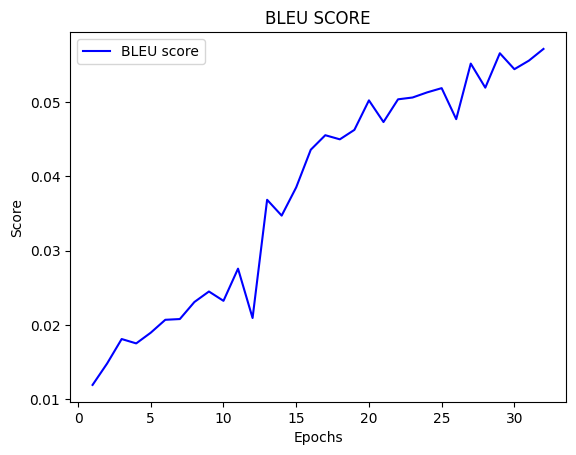

In [30]:
# 訓練模型
for epoch in range(num_epochs):
    train_losses = []
    test_losses = []
    bleu_scores = []

    start_time = time.time()
    train_loss = train(path='./MODELS/translation_model({}).pth'.format(model_name))
    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch {epoch+1:02} | Train Time: {epoch_mins}m {epoch_secs}s')

    start_time = time.time()
    test_loss = evaluate()

    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    print(f'Epoch {epoch+1:02} | Test Time: {epoch_mins}m {epoch_secs}s')

    start_time = time.time()
    score = bleu_score()
    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    print(f'Epoch {epoch+1:02} | Eval Time: {epoch_mins}m {epoch_secs}s')

    # 儲存訓練好的模型
    #if(score > best_score):
    if(test_loss < best_loss):
      best_score = score
      best_loss = test_loss
      torch.save(model.state_dict(), './MODELS/best_translation_model({}).pth'.format(model_name))
      print('== save model ==')
    print('\tTrain Loss: {:.3f} | Test Loss: {:.3f}'.format(train_loss, test_loss))
    print('\tBLEU Score: {:.3f}'.format(score))

    if(best_score < 0.001):
      try:
        model.load_state_dict(torch.load('./MODELS/best_translation_model({}).pth'.format(model_name)))
      except:
        'nothing'

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    bleu_scores.append(score)

    loss_history(train_losses, test_losses, path=model_name, to_show=False)
    bleu_history(bleu_scores, path=model_name, to_show=False)

In [ ]:
bleu_score(test_source_sentences,model,tokenizer,max_length,device)

In [ ]:
from sacrebleu.metrics import BLEU

def sacrebleu_score(source_sentences,target_sentences,lang='ko'):
  global zh_tokenizer, ko_tokenizer, model, max_length, device
  model.eval()
  bleu = BLEU()
  bleu.trg_lang = lang
  avg_score = {'avg':0,'1-gram':0,'2-gram':0,'3-gram':0,'4-gram':0}

  # 生成目標語句
  generated_sentences = []
  with tqdm(total = len(source_sentences)) as pbar:
    for i in range(len(source_sentences)):
        source_sentence = source_sentences[i]
        target_sentence = target_sentences[i]
        source_tokens = zh_tokenizer(source_sentence, padding=True, truncation=True, return_tensors='pt', max_length=max_length).to(device)
        with torch.no_grad():
            output = model(input_ids=source_tokens.input_ids, attention_mask=source_tokens.attention_mask)
        generated_sentence = ko_tokenizer.decode(output[0].argmax(dim=-1), skip_special_tokens=True)
        gen_sent = ''
        for sent in generated_sentence:
            gen_sent += sent 
        bleu_score = bleu.corpus_score([gen_sent],[[target_sentence]])
        #print([gen_sent],[[target_sentence]])
        #print(bleu_score)
        avg_score['avg'] += bleu_score.score      
        avg_score['1-gram'] += bleu_score.precisions[0]        
        avg_score['2-gram'] += bleu_score.precisions[1]
        avg_score['3-gram'] += bleu_score.precisions[2]
        avg_score['4-gram'] += bleu_score.precisions[3]
        pbar.update(1)
  avg_score['avg'] /= len(source_sentences)
  avg_score['1-gram'] /= len(source_sentences)
  avg_score['2-gram'] /= len(source_sentences)
  avg_score['3-gram'] /= len(source_sentences)
  avg_score['4-gram'] /= len(source_sentences)

  #print('gen:',generated_sentences,'tar:',[[sent] for sent in target_sentences],'sor',source_sentences)
  #print('BLEU Score:',bleu.score)

  return avg_score

In [ ]:
train_score = sacrebleu_score(TRAIN_ZSENT,TRAIN_KSENT)
test_score = sacrebleu_score(TEST_ZSENT,TEST_KSENT)
print('Train:',train_score)
print('Test:',test_score)